# Housing Datasets:

## Gov DataSets: (Free to Use)

The United States Census Bureau Offers very specific data on real estate:
Example (2021 New York City Housing and Vancancy Survey Micro Data):
[Link to example](https://www.census.gov/data/datasets/2021/demo/nychvs/microdata.html)


More Government Housing DataSets:
[Link to Data](https://www.census.gov/topics/housing/data/datasets.html)

## Zillow DataSets: (Free to Use/Download CSV Files)

[Link to zillow dataset](https://www.zillow.com/research/data/)

**Home Values**: Zillow Home Value INdex (ZHVI)
1. Typical home values in different percentiles
2. Availble for 
    - single gamily residences
    - condo/co op homes
    - homes with 1,2,3,4, and 5+ bedrooms

**Home Vlaue Forecasts:** Zillow Home Value Forecast (ZHVF)
1. Month ahead, quarter-ahead, and year ahead forecasts
2. For all homes (SFR, Confo, Co-op)
3. Metro and US

**Rentals**: Zillow Observed Rent Index (ZORI)
1. Market rate rents
2. Categories
   - all homes
   - single family
   - multi family
3. Metro and US

**Rental Forecast**: Zillow Observed Rent Forecast (ZORF)
1. Forecast of ZORI for a month, quarter, and year ahead
2. U.S

**For Sale Listings**: 
1. For sale inventory (count of active listings each month)
2. New listings (every month)
3. Newly pending listings (listings pending status)
4. Median list price
5. Metro US

**Sales**: 
1. Sales Count nowcast
2. Sale price (median & mean)
3. Total transaction value
4. Sale to list ratio (sale price vs list price)
5. Metro/US

**Market Heat Index**:
1. Supply demand in a market
2. Single family + condo homes
3. Metro / US

**New Construction**: 
1. Number of sold new Constrcution Homes
2. New construction median sale price
3. Median slate price per sqft
4. Metro/US

## Zillow API: (via Bridge Interactive and MLS Integrations)

- API is part of Zillow’s developer platform and allows access to more granular data, such as property-level details and comprehensive real estate records.
- Through the Bridge Interactive platform, Zillow connects to Multiple Listing Service (MLS) datasets, which are extensive, property-level databases maintained by real estate professionals.
- This data is much richer and includes information like listings, sales history, taxes, photos, and agent-provided details.
- APIs requires developer accounts, authentication, and sometimes payment for higher usage tiers

## Kaggle Housing DataSets:

Key Words: House Prices USA, Real Estate USA, Housing DataSets USA, Zillow Data 

Links to potentially interesting data sets:
USA Real Estate Dataset (300k+ entries): [Link to resource](https://www.kaggle.com/discussions/general/333339) <br>
**Attributes:**
- status
- price
- bed
- bath
- acre_lot
- full_address
- street
- city
- state
- zip_code
- house_size
- sold_date


In [22]:
import pandas as pd
import os

data_directory = "./Zillow_DataSets"

# File paths in dictionary
csv_files = {
    "For Sale Listings": os.path.join(data_directory, "For_Sale_Listing.csv"),
    "Home Values": os.path.join(data_directory, "Home_Values.csv"),
    "Home Values Forecast": os.path.join(data_directory, "Home_Values_Forecast.csv"),
    "Market Heat Index": os.path.join(data_directory, "Market_Heat_Index.csv"),
    "Rentals": os.path.join(data_directory, "Rentals.csv"),
    "Sales": os.path.join(data_directory, "Sales.csv")
}


def load_and_explore_csv(file_path):
    print(f"Loading data from: {file_path}")
    df = pd.read_csv(file_path)
    
    # Display basic information
    print("\nAttributes (Columns):")
    print(df.columns.tolist())
    
    print("\nFirst 5 Rows:")
    print(df.head())

    return df


# print(load_and_explore_csv(csv_files["For Sale Listings"]))

Exploring dataset: Rentals
Loading data from: ./Zillow_DataSets/Rentals.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-

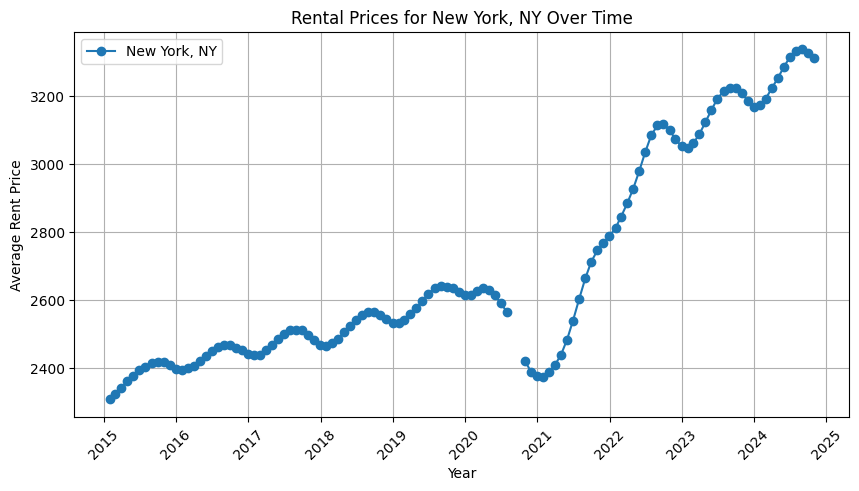

In [23]:
import matplotlib.pyplot as plt

print(f"Exploring dataset: Rentals")
rental_dataframe = load_and_explore_csv(csv_files["Rentals"])

# chose region 'New York'
region_name = 'New York, NY'
region_data = rental_dataframe[rental_dataframe['RegionName'] == region_name]

# Drop non-date columns (e.g., 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName')
region_data = region_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# Convert column headers to datetime
region_data.columns = pd.to_datetime(region_data.columns)

# Plot the time-series data for the selected region
plt.figure(figsize=(10, 5))
plt.plot(region_data.columns, region_data.iloc[0], marker='o', label=region_name)
plt.title(f"Rental Prices for {region_name} Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rent Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()